<a href="https://colab.research.google.com/github/jeffreyalanwang/IBHL/blob/main/Transit_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data to model.
5. Predict the test data.
6. Evaluate the first algorithm and its model performance.
7. Evaluate the current algorithm and variety of algorithms by creating test harness for diverse algorithms in conjunction with resampling techniques like cross validation, variable importance,bootstrapping. Improve Result by playing with hyperparameters and innovative methods like ensembles.
8. Choose the best model and present the results.

# 1. Define the Research problem and questions

# 2. Analyze data by descriptive statistics and graphical visualization.

In [ ]:
# Import required packages
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Read the data, print the shape and first 5 rows.
data = pd.read_csv('Dataset copy 1.csv')
print(data.shape)
print(data.head())

# debug: print(data.iloc[305])

(705, 15)
  Mode TOS State  Area  Unlinked Passenger Trips  Passenger Miles Traveled  \
0   MB  DO    WA    14                  42112037                 173679796   
1   SR  DO    WA    14                    829953                    992847   
2   TB  DO    WA    14                   7976186                  14349255   
3   VP  DO    WA    14                    512160                  10548410   
4   DR  DO    WA    96                    143809                   1024076   

   Vehicle & Pass. Car Revenue Miles  Vehicle Revenue Hours  \
0                           30859322                2832920   
1                             187454                  36358   
2                            2685561                 403910   
3                            3264549                 101881   
4                            1066946                  64463   

   Vehicles Operated in Maximum Service   Service Area Population   \
0                                   824                    2287050   
1 

In [ ]:
# Print the summary of the data

print(data.describe())
print(data.describe().T)

             Area  Unlinked Passenger Trips  Passenger Miles Traveled  \
count  705.000000              7.050000e+02              7.050000e+02   
mean   104.004255              5.791234e+06              2.477474e+07   
std    117.958962              5.247108e+07              2.199514e+08   
min      1.000000              3.873000e+03              0.000000e+00   
25%     14.000000              9.788000e+04              7.288550e+05   
50%     51.000000              4.347080e+05              2.716039e+06   
75%    158.000000              1.827182e+06              9.191097e+06   
max    487.000000              1.311225e+09              5.668693e+09   

       Vehicle & Pass. Car Revenue Miles  Vehicle Revenue Hours  \
count                       7.050000e+02           7.050000e+02   
mean                        3.977690e+06           2.912209e+05   
std                         1.460334e+07           9.703932e+05   
min                         1.478000e+03           2.240000e+02   
25%    

In [ ]:
# Print the datatypes which are keys.
types = data.dtypes
print(types)
print("Keys of dataset:\n", data.keys())

Mode                                     object
TOS                                      object
State                                    object
Area                                      int64
Unlinked Passenger Trips                  int64
Passenger Miles Traveled                  int64
Vehicle & Pass. Car Revenue Miles         int64
Vehicle Revenue Hours                     int64
Vehicles Operated in Maximum Service      int64
 Service Area Population                  int64
 Service Area SQ Miles                    int64
Avg Trip Length FY                      float64
Avg Cost Per Trip FY                    float64
Avg Fares Per Trip FY                   float64
1 million * Events / UPT                float64
dtype: object
Keys of dataset:
 Index(['Mode', 'TOS', 'State', 'Area', 'Unlinked Passenger Trips',
       'Passenger Miles Traveled', 'Vehicle & Pass. Car Revenue Miles',
       'Vehicle Revenue Hours', 'Vehicles Operated in Maximum Service',
       ' Service Area Population ', '

In [ ]:
# print the target variable

print("Event rate:", data['1 million * Events / UPT'])

Event rate: 0       4.7017
1       3.6147
2       3.3851
3      11.7151
4       6.9537
        ...   
700    29.4852
701    17.7316
702     4.5328
703    40.7614
704    33.8341
Name: 1 million * Events / UPT, Length: 705, dtype: float64


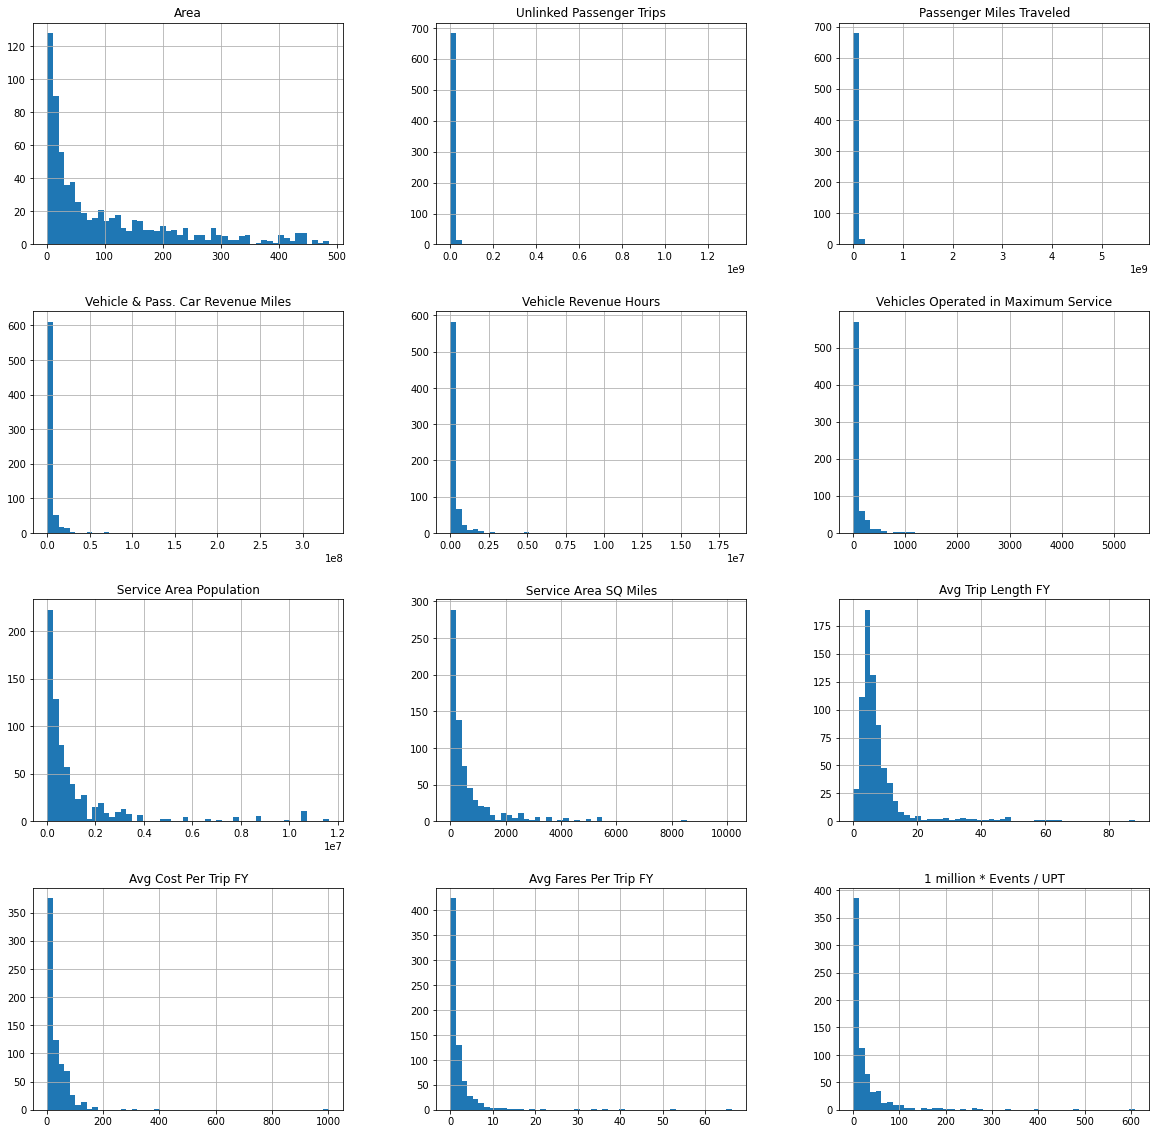

In [ ]:
# Create the histogram of all the variables.

get_ipython().run_line_magic('matplotlib', 'inline')
data.hist(figsize = (20,20), bins = 50)
plt.show()

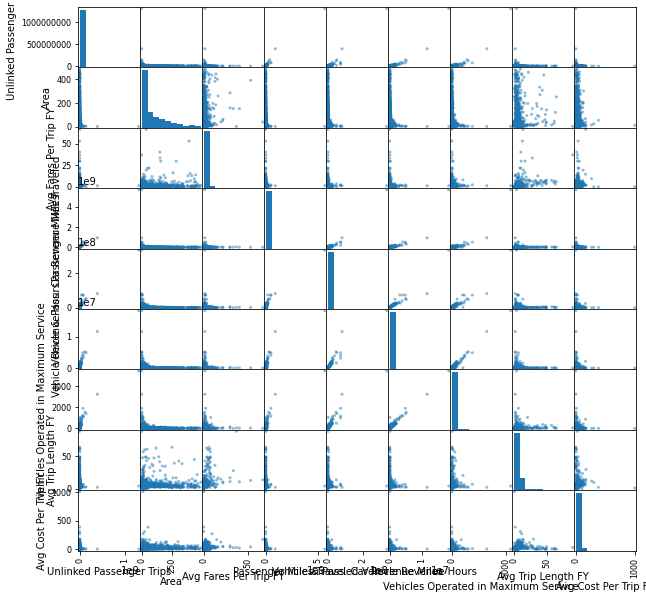

In [ ]:
# create a grid of scatterplot and histogram

get_ipython().run_line_magic('matplotlib', 'inline')
X = data[['Unlinked Passenger Trips','Area','Avg Fares Per Trip FY', 'Passenger Miles Traveled', "Vehicle & Pass. Car Revenue Miles", "Vehicle Revenue Hours", "Vehicles Operated in Maximum Service", "Avg Trip Length FY", "Avg Cost Per Trip FY"
]]
y = data[['1 million * Events / UPT']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(10, 10))
plt.show()

In [ ]:
# Creating a pairplot differentiatied by Risk

get_ipython().run_line_magic('matplotlib', 'inline')
X = data[['Mode', 'Unlinked Passenger Trips','Vehicle & Pass. Car Revenue Miles', 'Vehicles Operated in Maximum Service', '1 million * Events / UPT']]
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = '1 million * Events / UPT')
plt.show()

In [ ]:
#create a parallel coordinate plot
#parallel_coordinates(data, "1 million * Events / UPT")
#plt.show()

# 3. Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# categorical factors into numerical
data['Mode'] = data['Mode'].map({'AG':1, 'CB':2, 'CC':3, 'DR':4, 'FB': 5, 'IP':6, 'HR':7, 'JT':8, 'LR':9, 'MB':10, 'MG':11, 'MO':12, 'PB':13, 'RB': 14, 'SR': 15, 'TB': 16, 'TR': 17, 'VP':18, 'YR':19})
data['TOS'] = data['TOS'].map({"DO": 1, "PT": 2, "TN": 3, "TX": 4})
data['State'] = data['State'].map({'AL':1,'AK':2,'AZ':3,'AR':4,'CA':5,'CO':6,'CT':7, 'DE':8,'FL':9,'GA':10,'HI':11,'ID':12,'IL':13,'IN':14,'IA':15,'KS':16,'KY':17,'LA':18,'ME':19,'MD':20,'MA':21,'MI':22,'MN':23,'MS':24,'MO':25,'MT':26,'NE':27,'NV':28,'NH':29,'NJ':30,'NM':31,'NY':32,'NC':33,'ND':34,'OH':35,'OK':36,'OR':37,'PA':38,'RI':39,'SC':40,'SD':41,'TN':42,'TX':43,'UT':44,'VT':45,'VA':46,'WA':47,'WV':48,'WI':49,'WY':50, 'DC':51, 'PR': 52})

In [ ]:
# cut target into categories
data['1 million * Events / UPT'] = pd.qcut(data['1 million * Events / UPT'], q=3, labels=['low','medium','high'])
print(data['1 million * Events / UPT'])

0         low
1         low
2         low
3      medium
4      medium
        ...  
700      high
701    medium
702       low
703      high
704      high
Name: 1 million * Events / UPT, Length: 705, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


In [ ]:
data.value_counts('1 million * Events / UPT')

1 million * Events / UPT
low       235
medium    235
high      235
dtype: int64

In [ ]:
# search for NaN

print(data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [Mode, TOS, State, Area, Unlinked Passenger Trips, Passenger Miles Traveled, Vehicle & Pass. Car Revenue Miles, Vehicle Revenue Hours, Vehicles Operated in Maximum Service,  Service Area Population ,  Service Area SQ Miles , Avg Trip Length FY, Avg Cost Per Trip FY, Avg Fares Per Trip FY, 1 million * Events / UPT]
Index: []


# 4. Divide data into test an training set and Standardization.

In [ ]:
print(list(data))
print(data.dtypes)

['Mode', 'TOS', 'State', 'Area', 'Unlinked Passenger Trips', 'Passenger Miles Traveled', 'Vehicle & Pass. Car Revenue Miles', 'Vehicle Revenue Hours', 'Vehicles Operated in Maximum Service', ' Service Area Population ', ' Service Area SQ Miles ', 'Avg Trip Length FY', 'Avg Cost Per Trip FY', 'Avg Fares Per Trip FY', '1 million * Events / UPT']
Mode                                       int64
TOS                                        int64
State                                      int64
Area                                       int64
Unlinked Passenger Trips                   int64
Passenger Miles Traveled                   int64
Vehicle & Pass. Car Revenue Miles          int64
Vehicle Revenue Hours                      int64
Vehicles Operated in Maximum Service       int64
 Service Area Population                   int64
 Service Area SQ Miles                     int64
Avg Trip Length FY                       float64
Avg Cost Per Trip FY                     float64
Avg Fares Per Tri

In [ ]:
# not enough rows have risk of medium or high... so duplicate those :)
# select rows where 1 million * Events / UPT is medium or high
# make copies and add them to dataframe
#NO LONGER NEEDED (-jeffrey) because of switch to qcut

#reps = [5 if val=="medium" or val == "high" else 1 for val in data['1 million * Events / UPT']]
#data_new = data.loc[np.repeat(data.index.values, reps)]

#print(data_new["1 million * Events / UPT"]) #need to change dataframe name!!

#data = data_new

In [ ]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

X = data[['Mode', 'TOS', 'State', 'Area', 'Unlinked Passenger Trips', 'Passenger Miles Traveled', 'Vehicle & Pass. Car Revenue Miles', 'Vehicle Revenue Hours', 'Vehicles Operated in Maximum Service', ' Service Area Population ', ' Service Area SQ Miles ', 'Avg Trip Length FY', 'Avg Cost Per Trip FY', 'Avg Fares Per Trip FY']
]
y = data[['1 million * Events / UPT']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data normalization

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (528, 14)
y_train shape: (528, 1)
X_test shape: (177, 14)
y_test shape: (177, 1)


# 5. Fit the train data and predict for test data

In [ ]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting
#the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens
# the numpy.ndarray.

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred

array(['high', 'high', 'low', 'medium', 'high', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low',
       'medium', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'low', 'medium', 'medium', 'low', 'low', 'medium', 'high', 'high',
       'high', 'medium', 'low', 'high', 'low', 'high', 'low', 'low',
       'low', 'medium', 'medium', 'low', 'high', 'low', 'high', 'medium',
       'high', 'low', 'high', 'high', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'high', 'high',
       'low', 'low', 'medium', 'high', 'high', 'low', 'medium', 'low',
       'high', 'low', 'medium', 'low', 'high', 'low', 'high', 'high',
       'low', 'high', 'high', 'low', 'low', 'high', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'medium', 'high', 'medium', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high',

# 6. Evaluate the first algorithm and its model performance.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

[[52  9  6]
 [ 3 42  7]
 [18 33  7]]
              precision    recall  f1-score   support

        high       0.71      0.78      0.74        67
         low       0.50      0.81      0.62        52
      medium       0.35      0.12      0.18        58

    accuracy                           0.57       177
   macro avg       0.52      0.57      0.51       177
weighted avg       0.53      0.57      0.52       177

57.06214689265536


# 7. Performance Improvement techniques

### a) k values

[0.5084745762711864, 0.559322033898305, 0.5536723163841808, 0.5706214689265536, 0.5423728813559322, 0.5536723163841808, 0.536723163841808, 0.5649717514124294, 0.5536723163841808, 0.5706214689265536, 0.5875706214689266, 0.5819209039548022, 0.5536723163841808, 0.5480225988700564, 0.559322033898305, 0.576271186440678, 0.5706214689265536, 0.5875706214689266, 0.5649717514124294, 0.576271186440678, 0.5706214689265536, 0.5649717514124294, 0.5706214689265536, 0.559322033898305, 0.5536723163841808, 0.5480225988700564, 0.5536723163841808, 0.5423728813559322, 0.5536723163841808, 0.559322033898305, 0.5649717514124294, 0.559322033898305, 0.5706214689265536, 0.5819209039548022, 0.5932203389830508, 0.5875706214689266, 0.5988700564971752, 0.5988700564971752, 0.5932203389830508]


Text(0, 0.5, 'Testing Accuracy')

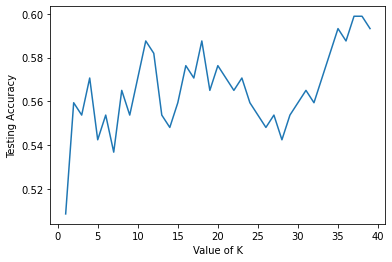

In [ ]:
k_range = range(1, 40)

# Creating a Python dictionary by [] and then appending the accuracy scores

scores = []
#  looping through the k range 1 to 40

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    # appending the accuracy scores in the dictionary named scores.
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
# Printing the K number of neighbors and Testing Accuracy.
import matplotlib.pyplot as plt

# This command allow plots to appear within the notebook
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

### b) cross validation

In [ ]:
rng = np.random.RandomState(1338)
#cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y['1 million * Events / UPT'].map({'low':'green','medium':'yellow','high':'red'}), marker="_", lw=lw, cmap=cmap_cv
    )

    #ax.scatter(
    #    range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_cv
    #)

    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, len(y)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

[0.55319149 0.5106383  0.64539007 0.5248227  0.53900709]
0.5546099290780142


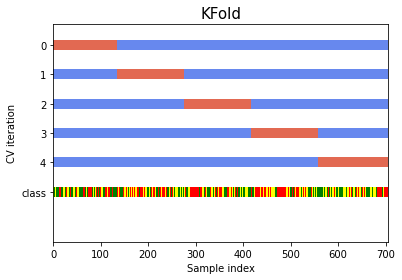

In [ ]:
# Optimizing the k-nn by using Cross validation

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=23)

# haha im so confused... ignore the next 2 lines :)
#X = data[['Unlinked Passenger Trips','Area','Avg Fares Per Trip FY', 'Passenger Miles Traveled', "Vehicle & Pass. Car Revenue Miles", "Vehicle Revenue Hours", "Vehicles Operated in Maximum Service", "Avg Trip Length FY", "Avg Cost Per Trip FY"]]
#y = data[['1 million * Events / UPT']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)


n_splits = 5
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, None, ax, n_splits)

#train model with cv of 10
cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=cv)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

### c) cross validation: k values and cross validation

In [ ]:
# Using cross validation with all possible k values.

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scores = []
# Train with 5 fold cross validation by an outer k value ranges and nested cross validation scores.
k_range = range(1, 40)
for k in k_range:
#train model with cv of 5
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=KFold(5))
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    scores.append(np.mean(cv_scores))

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')



### d) Feature Importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

sns.set(style="whitegrid")
from matplotlib import pyplot as plt


# overriding the default figure size and font size.
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})


data = pd.read_csv('Dataset copy 1.csv')
X = pd.DataFrame(data)

# categorical factors into numerical
data['Mode'] = data['Mode'].map({'AG':1, 'CB':2, 'CC':3, 'DR':4, 'FB': 5, 'IP':6, 'HR':7, 'JT':8, 'LR':9, 'MB':10, 'MG':11, 'MO':12, 'PB':13, 'RB': 14, 'SR': 15, 'TB': 16, 'TR': 17, 'VP':18, 'YR':19})
data['TOS'] = data['TOS'].map({"DO": 1, "PT": 2, "TN": 3, "TX": 4})
data['State'] = data['State'].map({'AL':1,'AK':2,'AZ':3,'AR':4,'CA':5,'CO':6,'CT':7, 'DE':8,'FL':9,'GA':10,'HI':11,'ID':12,'IL':13,'IN':14,'IA':15,'KS':16,'KY':17,'LA':18,'ME':19,'MD':20,'MA':21,'MI':22,'MN':23,'MS':24,'MO':25,'MT':26,'NE':27,'NV':28,'NH':29,'NJ':30,'NM':31,'NY':32,'NC':33,'ND':34,'OH':35,'OK':36,'OR':37,'PA':38,'RI':39,'SC':40,'SD':41,'TN':42,'TX':43,'UT':44,'VT':45,'VA':46,'WA':47,'WV':48,'WI':49,'WY':50, 'DC':51, 'PR': 52})

# cut target into categories
#data['1 million * Events / UPT'] = pd.qcut(data['1 million * Events / UPT'], q=3, labels=['low','medium','high'])
#print(data['1 million * Events / UPT'])

# search for NaN

print(data[data.isna().any(axis=1)])

In [ ]:
X = X.iloc[:,0:13]
print(X)


y = data['1 million * Events / UPT']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# Generating the importance of predictive variables using Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
print(rf.feature_importances_)
# Sorting them in descending order
sorted_idx = rf.feature_importances_.argsort()
# Printing feature scores
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(sorted_idx)

# alternate way of viewing the feature scores in descending order

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)
# f, ax represents  figure f and the axes.
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=data.T)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
# Using a subset of predictor feature variables for the classification:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model

from sklearn.preprocessing import StandardScaler
from sklearn import metrics


data = pd.read_csv('Dataset copy 1.csv')

# categorical factors into numerical
data['Mode'] = data['Mode'].map({'AG':1, 'CB':2, 'CC':3, 'DR':4, 'FB': 5, 'IP':6, 'HR':7, 'JT':8, 'LR':9, 'MB':10, 'MG':11, 'MO':12, 'PB':13, 'RB': 14, 'SR': 15, 'TB': 16, 'TR': 17, 'VP':18, 'YR':19})
data['TOS'] = data['TOS'].map({"DO": 1, "PT": 2, "TN": 3, "TX": 4})
data['State'] = data['State'].map({'AL':1,'AK':2,'AZ':3,'AR':4,'CA':5,'CO':6,'CT':7, 'DE':8,'FL':9,'GA':10,'HI':11,'ID':12,'IL':13,'IN':14,'IA':15,'KS':16,'KY':17,'LA':18,'ME':19,'MD':20,'MA':21,'MI':22,'MN':23,'MS':24,'MO':25,'MT':26,'NE':27,'NV':28,'NH':29,'NJ':30,'NM':31,'NY':32,'NC':33,'ND':34,'OH':35,'OK':36,'OR':37,'PA':38,'RI':39,'SC':40,'SD':41,'TN':42,'TX':43,'UT':44,'VT':45,'VA':46,'WA':47,'WV':48,'WI':49,'WY':50, 'DC':51, 'PR': 52})

# cut target into categories
data['1 million * Events / UPT'] = pd.qcut(data['1 million * Events / UPT'], q=3, labels=['low','medium','high'])
print(data['1 million * Events / UPT'])

data_Optimize = data
# Remove spaces in the column names
data_Optimize.columns = data_Optimize.columns.to_series().apply(lambda x: x.strip())
X = data_Optimize[['Unlinked Passenger Trips','Avg Cost Per Trip FY','Passenger Miles Traveled','Vehicle Revenue Hours','Vehicle & Pass. Car Revenue Miles','Avg Trip Length FY','Area']]
y = data_Optimize[['1 million * Events / UPT']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data normalization

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

In [ ]:
scores = []
k_range = range(1, 40)
for k in k_range:
#train model with cv of 10
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    scores.append(np.mean(cv_scores))

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
accuracy_scores = metrics.accuracy_score(y_test, y_pred)
print(accuracy_scores)

# 8. Evaluating Algorithms: Train versus Test, Error Rates

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

## Training Evaluation
max_train_score = max(train_scores)

# # Store the max train test score index by enumerating through all the scores.

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Store the max score in the first curly parenthesis and the indices in the second.
# The lambda function takes the index starting at zero therefore one is added to get the k value.

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation by comparative graph.
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [ ]:
## Error Rate Graph
# Create an empty dictionary to collect errors across the different k-values
error = []

# Iterate throught k=1 to 40  and run the classifier.Predict and append the error for each iteration.
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test['1 million * Events / UPT']))

    # Create a plot of Mean error versus kvalue.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')